In [195]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import binary_crossentropy

In [197]:
X = pd.read_csv('/content/gdrive/MyDrive/X100.csv')
X = X.drop(columns = [X.columns[0]])
X = np.array(X)
rows = X.shape[0]
X = np.reshape(X, (rows, 100, 100, 1))
print(X.shape)

(3227, 100, 100, 1)


In [198]:
y = pd.read_csv('/content/gdrive/MyDrive/y100.csv')
y = y.drop(columns = [y.columns[0]])
y = np.array(y)
y = np.reshape(y, (rows, 1))
print(y.shape)

(3227, 1)


In [199]:
X, y = shuffle(X, y, random_state = 0)

In [200]:
X_train, X_k, y_train, y_k = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [201]:
print(X_train.shape, X_k.shape)

(2258, 100, 100, 1) (969, 100, 100, 1)


In [202]:
X_val, X_test, y_val, y_test = train_test_split(X_k, y_k, test_size = 0.50, random_state = 2)

In [203]:
print(X_train.shape, X_val.shape, X_test.shape)

(2258, 100, 100, 1) (484, 100, 100, 1) (485, 100, 100, 1)


[1]


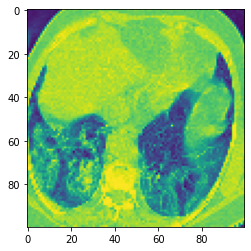

In [204]:
arr = X_train[1]
arr = np.reshape(arr, (100, 100))
plt.imshow(arr)
print(y_train[1])

In [205]:
mean = np.mean(X_train)
deviation = np.std(X_train)
X_train = (X_train - mean) / deviation

In [206]:
X_val = (X_val - mean) / deviation

In [207]:
model = keras.models.Sequential()

model.add(Conv2D(64, (3, 3), 1, 'same', activation = 'relu', input_shape = (100, 100, 1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), 1, 'same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), 1, 'same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.30))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
dropout_50 (Dropout)         (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
dropout_51 (Dropout)         (None, 50, 50, 128)       0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 25, 25, 256)     

In [208]:
model.compile(optimizer = Adam(learning_rate = 1e-3), loss = binary_crossentropy, metrics = ['accuracy'])
hist = model.fit(X_train, y_train, epochs = 20, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/20
71/71 [==============================] - 4s 41ms/step - loss: 0.7451 - accuracy: 0.5833 - val_loss: 0.6229 - val_accuracy: 0.6818
Epoch 2/20
71/71 [==============================] - 3s 36ms/step - loss: 0.6146 - accuracy: 0.6692 - val_loss: 0.5731 - val_accuracy: 0.6963
Epoch 3/20
71/71 [==============================] - 3s 37ms/step - loss: 0.5614 - accuracy: 0.7095 - val_loss: 0.5802 - val_accuracy: 0.7314
Epoch 4/20
71/71 [==============================] - 3s 36ms/step - loss: 0.4962 - accuracy: 0.7582 - val_loss: 0.4909 - val_accuracy: 0.7934
Epoch 5/20
71/71 [==============================] - 3s 39ms/step - loss: 0.4491 - accuracy: 0.7994 - val_loss: 0.4675 - val_accuracy: 0.8409
Epoch 6/20
71/71 [==============================] - 3s 37ms/step - loss: 0.3967 - accuracy: 0.8286 - val_loss: 0.4096 - val_accuracy: 0.8492
Epoch 7/20
71/71 [==============================] - 3s 37ms/step - loss: 0.3418 - accuracy: 0.8499 - val_loss: 0.3804 - val_accuracy: 0.8264
Epoch 8/20
71

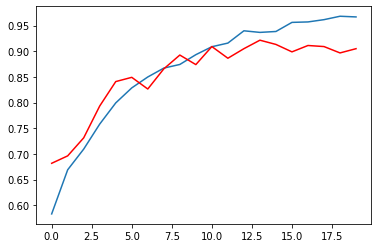

In [209]:
plt.plot(hist.history['accuracy'], label = 'Training accuracy')
plt.plot(hist.history['val_accuracy'], color = 'r', label = 'Validation accuracy')

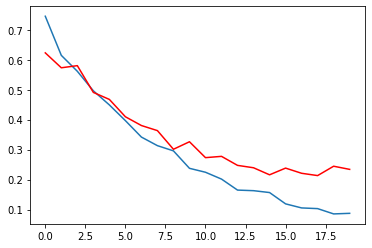

In [210]:
plt.plot(hist.history['loss'], label = 'Training loss')
plt.plot(hist.history['val_loss'], color = 'r', label = 'Validation loss')

In [211]:
X_test = (X_test - mean) / deviation

In [212]:
model.evaluate(X_test, y_test, verbose = 1)

16/16 [==============================] - 0s 12ms/step - loss: 0.2348 - accuracy: 0.9155


[0.23479849100112915, 0.915463924407959]

In [213]:
predicted = model.predict(x = X_test, verbose = 1)

16/16 [==============================] - 0s 10ms/step


In [214]:
ct = 0
for i in range(X_test.shape[0]):
  data = X_test[i]
  img = np.reshape(data, (100, 100, 1))
  if predicted[i] >= 0.5:
    g = 1
  else: 
    g = 0
  if y_test[i] != g:
    ct += 1
print(ct)

41


In [216]:
model.save('model_1.h5')